[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-05-park-input)


## 전국 도시 공원 표준 데이터
https://www.data.go.kr/dataset/15012890/standard.do
* **전국 도시 공원 표준데이터에는 데이터를 전처리 해보기에 좋은 데이터가 많습니다.**
* **시간, 결측치, 이상치, 수치형, 범주형 데이터를 고르게 볼 수 있으며 다양한 텍스트 데이터 처리를 해볼 수 있습니다.**
* 또 **정규표현식**을 활용해서 **텍스트 데이터 전처리와 데이터 마스킹 기법**에 대해 다룹니다.
* 그리고 이렇게 전처리한 내용을 바탕으로 **전국 도시공원에 대한 분포를 시각화**해 봅니다.
* 어떤 공원이 어느 지역에 어떻게 분포되어 있는지를 위경도로 표현해 봅니다.

### 이번 챕터에서 설치가 필요한 도구

* 별도의 설치가 필요합니다.(folium 을 설치했던 것 처럼 따로 설치해야지만 사용할 수 있습니다.)

* 윈도우
    * <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.
    * <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
* 맥
    * terminal 프로그램을 열어 설치해 주세요. 


#### Pandas Profiling
* [pandas-profiling/pandas-profiling: Create HTML profiling reports from pandas DataFrame objects](https://github.com/pandas-profiling/pandas-profiling)
- 기술통계값을 리포트 형태로 표현해 준다.
* 2020년 4월 기준 판다스 1.0 이상 버전을 지원하지 않습니다.
* 아나콘다로 주피터를 설치했다면 : `conda install -c conda-forge pandas-profiling`
* pip로 주피터를 설치했다면 : `pip install pandas-profiling`

#### 워드클라우드
[amueller/word_cloud: A little word cloud generator in Python](https://github.com/amueller/word_cloud)

* 다음 명령어로 설치가 가능합니다. conda prompt 혹은 터미널을 열어 설치해 주세요.

* conda : `conda install -c conda-forge wordcloud`
* pip : `pip install wordcloud`


### 분석에 사용할 도구를 불러옵니다.

In [30]:
# 필요한 라이브러리를 로드합니다.
# pandas, numpy, seaborn, matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Seaborn 설정으로 시각화의 스타일, 폰트 설정하기
* [matplotlib.pyplot.rc — Matplotlib 3.1.3 documentation](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.rc.html)

<AxesSubplot:title={'center':'한글폰트'}>

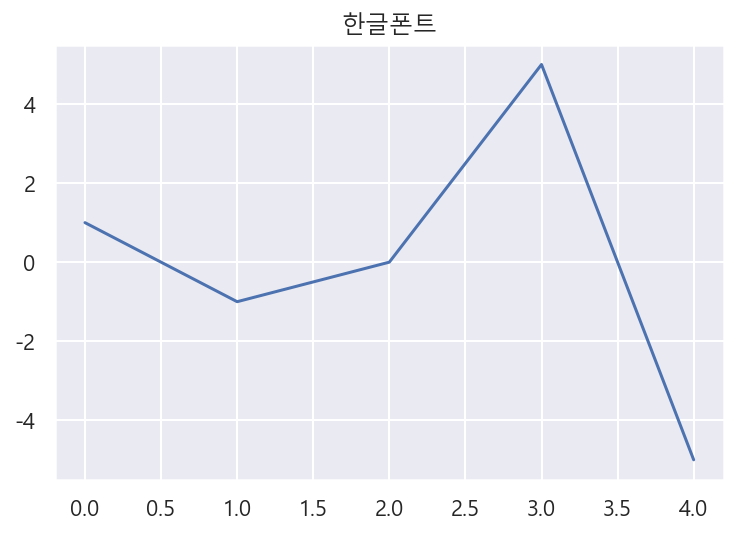

In [31]:
# seaborn 의 set 기능을 통해 폰트, 마이너스 폰트 설정, 스타일 설정을 합니다.
# Wind : "Malgun Gothic", MAC:"AppleGothic"

plt.rc("font", family="Malgun Gothic")

sns.set(font="Malgun Gothic",
      rc={"axes.unicode_minus":False},
      style="darkgrid")

pd.Series([1, -1, 0, 5, -5]).plot(title="한글폰트")

In [32]:
# 그래프가 선명하게 표시되도록 합니다.

from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

### 데이터 로드

In [33]:
# 데이터를 로드해서 df 라는 변수에 담습니다.

df = pd.read_csv("data/전국도시공원표준데이터.csv", encoding="cp949")
df.shape

(18137, 20)

In [34]:
# 미리보기를 합니다.

df.head()

# 공원을 관리하고 있다면? 
# -> 내부 시설, 면적 비교 등을 해볼 수 있을 것.
# 도로명 주소에 지번주소 등으로 서로 결측치를 채울 수 있을 것. 

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
1,26440-00002,압곡공원,근린공원,NaN,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,4,NaN,NaN,NaN,"배드민턴장, 족구장, 파고라4, 안내판, 볼라드7, 데크435.11㎡, 데크계단19...",2008-02-28,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
2,26440-00003,서연정공원,소공원,NaN,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,7,NaN,NaN,NaN,"앉음벽13.57m, 트렐리스3, 안내판2, 플랜트2, 파고라, 평의자4",2013-01-23,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
3,26440-00004,용두공원,어린이공원,NaN,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,NaN,"조합놀이기구, 그네",NaN,NaN,"정자, 농구장, 평의자6",1998-07-25,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
4,26440-00005,새동내공원,어린이공원,NaN,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,8,"조합놀이기구, 그네, 흔들놀이기구2",NaN,NaN,"정자, 평의자14, 트렐리스2, 안내판, 볼라드",1995-04-07,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN


### Pandas Profiling
- Pandas를 통해서 기술통계 요약을 한꺼번에 보여주는 리포트를 생성해 준다.

- Quantile statistics like minimum value, Q1, median, Q3, maximum, range, interquartile range
- Descriptive statistics like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness ...

* [pandas-profiling/pandas-profiling: Create HTML profiling reports from pandas DataFrame objects](https://github.com/pandas-profiling/pandas-profiling)

* 별도의 설치가 필요합니다.(folium 을 설치했던 것 처럼 따로 설치해야지만 사용할 수 있습니다.)
* conda : `conda install -c conda-forge pandas-profiling`
* pip : `pip install pandas-profiling`

- 변수가 20여개, 데이터의 수가 만 8천개 정도는 큰 숫자가 아니다.
<br>이보다 훨씬 많은 양의 데이터라면, 지난 수업과 같이
<br>필요한 데이터만 갖도록 축소시켜서 pandas profiling 이용할 것.

In [35]:
#import pandas as pd 
#print(pd.__version__)

#!pip show pandas_profiling

In [36]:
# 버전에 따라 기능의 차이가 있습니다. 
# 이 강좌에서 사용하는 버전은 다음과 같습니다.

import pandas_profiling
# ProfileReport?

* 미리 생성해 놓은 리포트 보기 : https://corazzon.github.io/open-data-analysis-basic/05-park_pandas_profile.html

In [37]:
# pandas_profiling 의 ProfileReport 를 불러와 표현합니다.
# 이 때 title은 "도시공원 표준 데이터" 로 하고 주피터 노트북에서 바로 보면 iframe을 통해 화면이 작게 보이기 때문에
# 별도의 html 파일로 생성해서 그려보세요.
from pandas_profiling import ProfileReport

# %time 으로 시간이 얼마나 걸리는지 측정
# %time profile = ProfileReport(df, title="도시공원 표준 데이터")

#profile = ProfileReport(df, title="도시공원 표준 데이터")
#profile.to_file(output_file="05-park_pandas_profile.html")

# 위에서 이미 폰트를 설정했더라도 pandas profiling 내부에서 폰트가 깨지는 걸 방지하기 위해 재설정이 필요합니다.
#import matplotlib 
#matplotlib.font_manager._rebuild()

# pandas profiling 에서 폰트가 깨진다면 아래코드의 주석을 풀고 폰트를 재설정 해보세요.
# 운영체제에 맞는 폰트를 설정해 주세요.
# Win
# plt.rc("font", family="Malgun Gothic")
# Mac
# plt.rc("font", family="AppleGothic")
# 위 폰트 설정 방법으로 오류가 난다면 아래의 seaborn set을 통해 설정해 보세요.
# Win
#sns.set(font="Malgun Gothic")
# Mac
# sns.set(font="AppleGothic")



### 기본 정보 보기

In [38]:
# info로 기본 정보를 봅니다.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          18137 non-null  object 
 1   공원명           18137 non-null  object 
 2   공원구분          18137 non-null  object 
 3   소재지도로명주소      8039 non-null   object 
 4   소재지지번주소       17158 non-null  object 
 5   위도            18137 non-null  float64
 6   경도            18137 non-null  float64
 7   공원면적          18137 non-null  float64
 8   공원보유시설(운동시설)  4845 non-null   object 
 9   공원보유시설(유희시설)  6964 non-null   object 
 10  공원보유시설(편익시설)  5084 non-null   object 
 11  공원보유시설(교양시설)  1160 non-null   object 
 12  공원보유시설(기타시설)  3116 non-null   object 
 13  지정고시일         15225 non-null  object 
 14  관리기관명         17383 non-null  object 
 15  전화번호          16957 non-null  object 
 16  데이터기준일자       18137 non-null  object 
 17  제공기관코드        18137 non-null  object 
 18  제공기관명         18137 non-nu

In [39]:
# 결측치의 수를 구합니다.

df.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        10098
소재지지번주소           979
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    13292
공원보유시설(유희시설)    11173
공원보유시설(편익시설)    13053
공원보유시설(교양시설)    16977
공원보유시설(기타시설)    15021
지정고시일            2912
관리기관명             754
전화번호             1180
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 19     18137
dtype: int64

In [40]:
# 결측치 비율 구하기
# 결측의 평균을 통해 비율을 구하고 100을 곱해줍니다.

round(df.isnull().mean() * 100 , 2) # round로 소수점 둘째자리까지만 보기 
# 교양시설에 결측치 굉장히 높음 
# 도로명주소 <-> 지번주소 서로 채워주기 할 수 있을 것

# 전화번호 등에 마스킹 처리 필요가 있음 

관리번호              0.00
공원명               0.00
공원구분              0.00
소재지도로명주소         55.68
소재지지번주소           5.40
위도                0.00
경도                0.00
공원면적              0.00
공원보유시설(운동시설)     73.29
공원보유시설(유희시설)     61.60
공원보유시설(편익시설)     71.97
공원보유시설(교양시설)     93.60
공원보유시설(기타시설)     82.82
지정고시일            16.06
관리기관명             4.16
전화번호              6.51
데이터기준일자           0.00
제공기관코드            0.00
제공기관명             0.00
Unnamed: 19     100.00
dtype: float64

### 결측치 시각화
* [ResidentMario/missingno: Missing data visualization module for Python.](https://github.com/ResidentMario/missingno)

<AxesSubplot:>

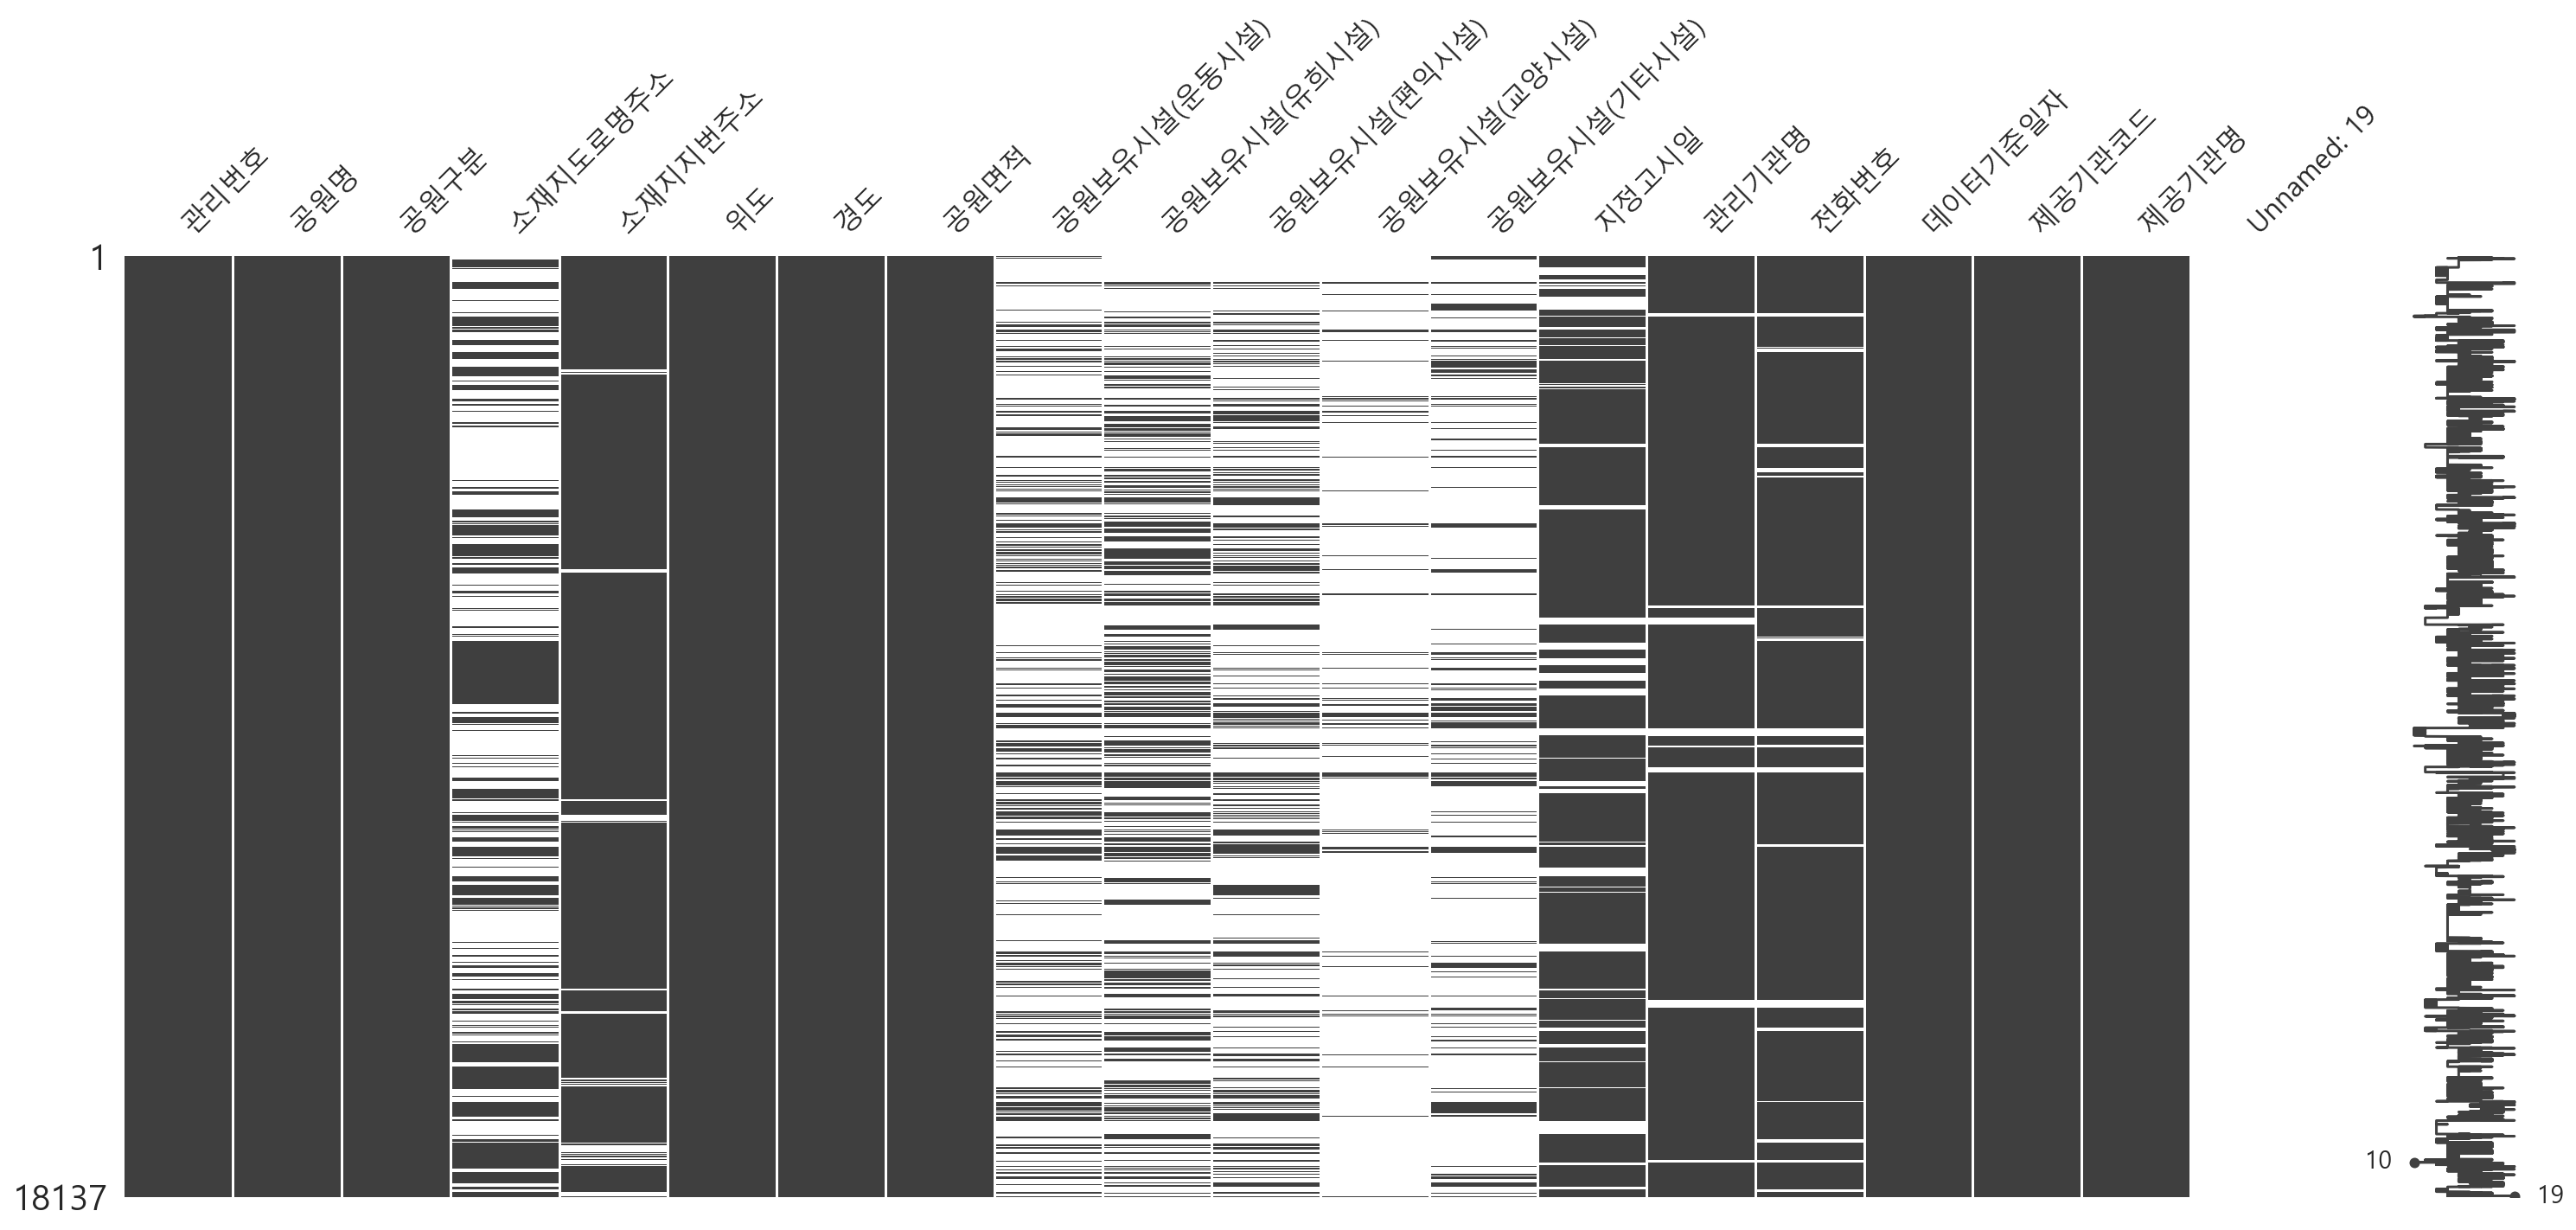

In [41]:
# 이전 챕터에서 설치하지 않았다면 아나콘다에 missingno를 설치합니다. 
# !conda install -c conda-forge missingno
# 라이브러리를 로드합니다.

import missingno

missingno.matrix(df)

* 그래프의 색상 선택 : [Choosing Colormaps in Matplotlib — Matplotlib 3.1.0 documentation](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

- seaborn을 통해 위와 같은 결측치 그래프를 그려봅니다.

<AxesSubplot:>

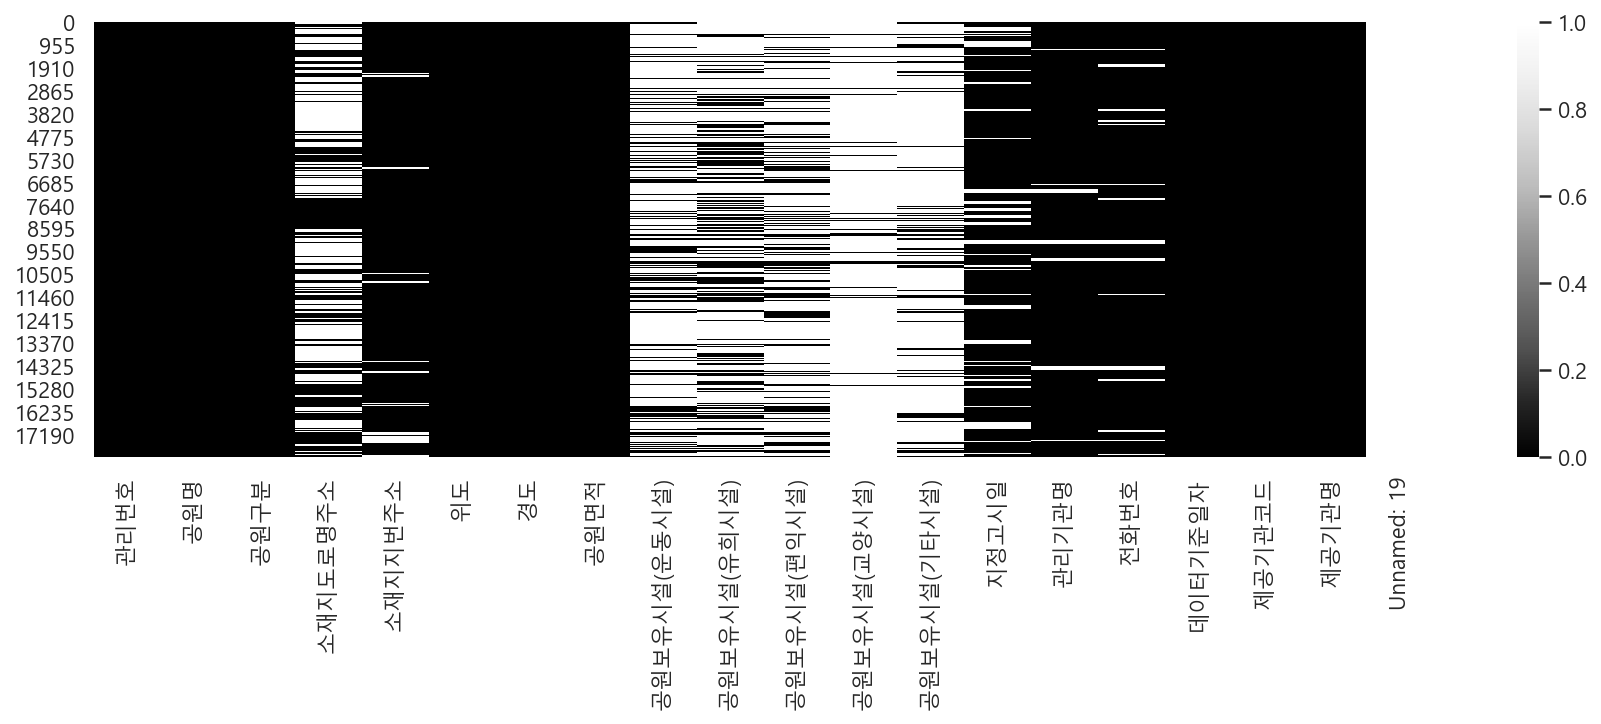

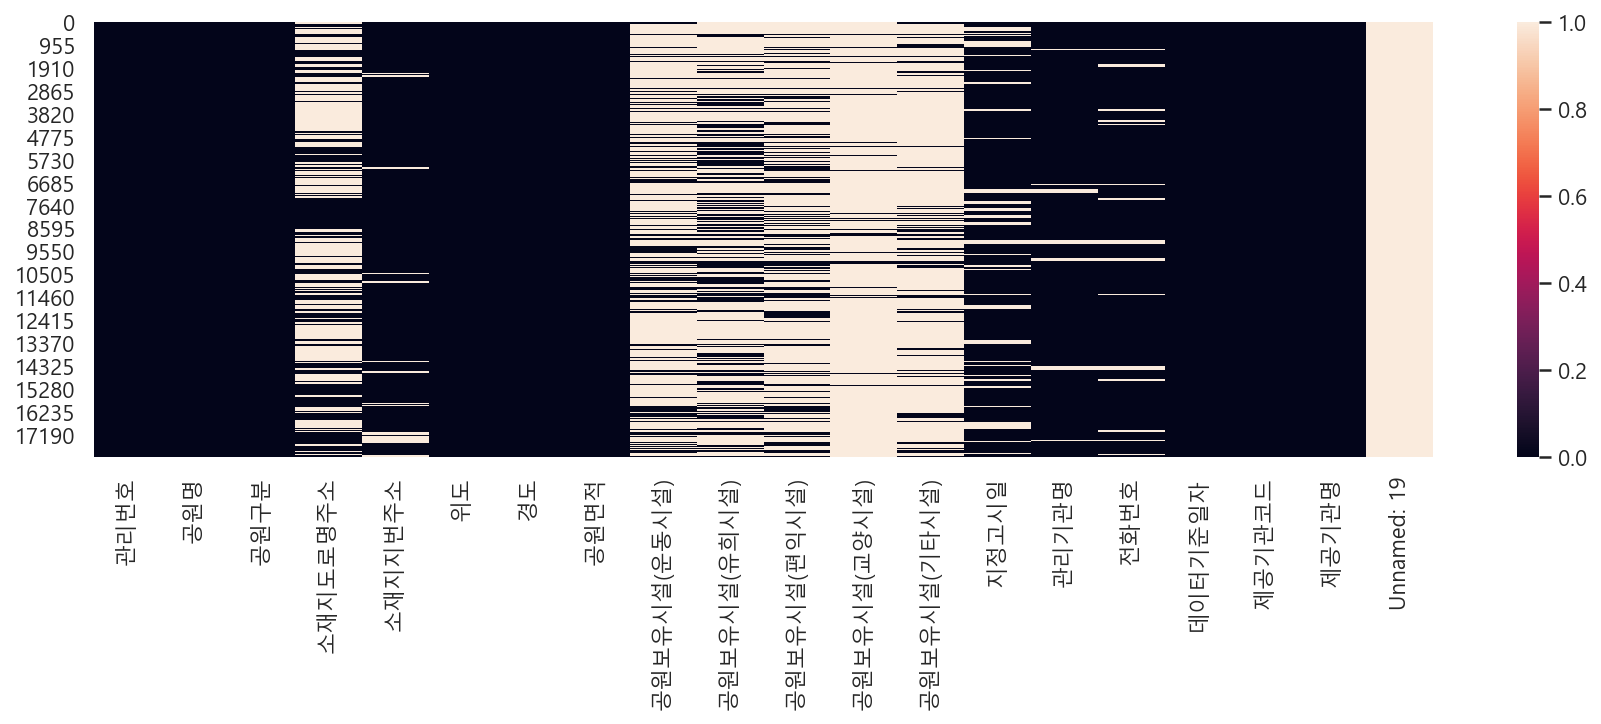

In [42]:
# seaborn을 통해 위와 같은 결측치 그래프

null = df.isnull()

plt.figure(figsize=(15,4))
sns.heatmap(null, cmap="Greys_r") # _r : riverse 결측치를 흰색으로
# 1.0이 true 값

plt.figure(figsize=(15,4))
sns.heatmap(null)